In [122]:
%matplotlib inline
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from IPython.core.debugger import set_trace
from IPython.display import clear_output
import time

In [123]:
def f(x):
    if x <= 1:
        return 0
    else:
        return 1/2 * x

In [124]:
def f_prime(x):
    if x <= 1:
        return 0
    else:
        return 1/2

In [125]:
# Dataset
D = [[0,1],[1,0]]

In [138]:
# init Weights and Bias
W, B = 0, 4

In [139]:
# our "neuron"
def n(x):
    global W, B
    return f(W * x + B)

In [140]:
def J1(y1,y2):
    return 1/2 * (y1 - y2)**2

In [141]:
def J(w,b,x,y):
    return 1/2 * (y - f(w * x + b))**2

In [142]:
def drawGradientStep(w,b):
    
    fig = plt.figure(figsize=(30,10))
    
    # first plot
    axs1 = fig.add_subplot(1, 2, 1, projection='3d')
    
    x = y = np.arange(-5.0, 5.0, 0.05)
    X, Y = np.meshgrid(x, y)
    zs = np.array([J(x,y,0,1) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    #ax.contour3D(X, Y, Z, 100, cmap='binary')
    axs1.plot_wireframe(X, Y, Z, color='green')
    axs1.view_init(40,-10)

    axs1.scatter(w,b,J(w,b,0,1),c="r",s=100)
    
    axs1.set_xlabel('W')
    axs1.set_ylabel('B')
    axs1.set_zlabel('J')
    
    axs2 = fig.add_subplot(1, 2, 2, projection='3d')
    x = y = np.arange(-5.0, 5.0, 0.05)
    X, Y = np.meshgrid(x, y)
    zs = np.array([J(x,y,1,0) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    #ax.contour3D(X, Y, Z, 100, cmap='binary')
    axs2.plot_wireframe(X, Y, Z, color='blue')
    axs2.view_init(40,-45)

    axs2.scatter(w,b,J(w,b,1,0),c="r",s=100)
    
    axs2.set_xlabel('W')
    axs2.set_ylabel('B')
    axs2.set_zlabel('J')
    
    plt.show()
    print("W = " + str(w) + "\nB = " + str(b) + "\nJ = " + str(J(w,b,0,1)))
    print("\nn(0) = " + str(n(0)) + "\tn(1) = " + str(n(1)))

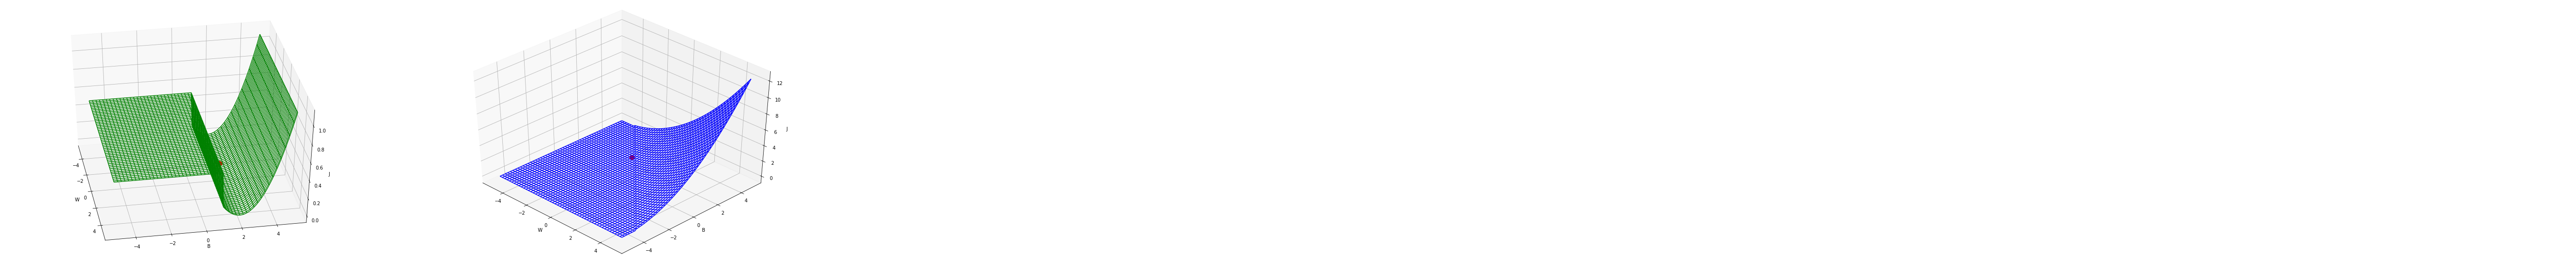

W = -1.2532220960596534
B = 2.0241833755468384
J = 7.310445660492744e-05

n(0) = 1.0120916877734192	n(1) = 0


In [ ]:
# main loop
alpha = 0.08


for i in range(20000):
    W_gradient, B_gradient = 0,0
    
    for x,y_actual in D:
        
        Y = n(x)
        
        dJdY = (Y - y_actual)
        dYdW = x * f_prime(W * x + B)
        dYdB = f_prime(W * x + B)
        
        B_gradient += dJdY * dYdB
        W_gradient += dJdY * dYdW

    W = W - (alpha * W_gradient)
    B = B - (alpha * B_gradient)
    
    clear_output(wait=True)
    drawGradientStep(W,B)